<h1>Data Preprocessing<h1>

<h2>Data reading<h2>

In [2]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/covid19.json")

In [2]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweets_df = tweets_df_extractor.get_tweet_df()
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",0.166667,0.188889,en,548,612,ketuesriche,551,351,False,[],"[{'screen_name': 'TelGlobalHealth', 'name': 'T...",Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...",0.133333,0.455556,en,195,92,Grid1949,66,92,False,[],"[{'screen_name': 'globalhlthtwit', 'name': 'An...","Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,"[{'text': 'red4research', 'indices': [103, 116]}]","[{'screen_name': 'NHSRDForum', 'name': 'NHS R&...",None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...",0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,False,[],"[{'screen_name': 'HighWireTalk', 'name': 'The ...",None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,0.280000,0.620000,en,72,20,pash22,28250,30819,None,[],"[{'screen_name': 'PeterHotez', 'name': 'Prof P...",United Kingdom


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       6532 non-null   int64  
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  3618 non-null   object 
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 765.6+

<h2>Missing values<h2>

In [4]:
tweets_df.isna().sum()

created_at               0
source                   0
original_text            0
polarity                 0
subjectivity             0
lang                     0
favorite_count           0
retweet_count            0
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    2914
hashtags                 0
user_mentions            0
place                 2444
dtype: int64

<h2>Remove unwanted columns<h2>

In [6]:
from clean_tweets_dataframe import Clean_Tweets

In [7]:
# remove "possibly_sensitive" column
clean_tweets = Clean_Tweets(tweets_df)
tweets_df = clean_tweets.drop_unwanted_column(tweets_df, ["possibly_sensitive"])
tweets_df.columns

Automation in Action...!!!


Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')

<h2>Drop duplicates<h2>

In [8]:
# shape of tweets_df
tweets_df.shape

(6532, 14)

In [11]:
tweets_df = clean_tweets.drop_duplicate(tweets_df)
tweets_df.shape

(6532, 14)

There were no duplicate rows.

<h2>Convert to datetime<h2>

In [13]:
tweets_df = clean_tweets.convert_to_datetime(tweets_df)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       6532 non-null   datetime64[ns, UTC]
 1   source           6532 non-null   object             
 2   original_text    6532 non-null   object             
 3   polarity         6532 non-null   float64            
 4   subjectivity     6532 non-null   float64            
 5   lang             6532 non-null   object             
 6   favorite_count   6532 non-null   int64              
 7   retweet_count    6532 non-null   int64              
 8   original_author  6532 non-null   object             
 9   followers_count  6532 non-null   int64              
 10  friends_count    6532 non-null   int64              
 11  hashtags         6532 non-null   object             
 12  user_mentions    6532 non-null   object             
 13  place            4

<h2>Remove tweets that are not english<h2>

In [14]:
tweets_df.shape

(6532, 14)

In [15]:
tweets_df = clean_tweets.remove_non_english_tweets(tweets_df)
tweets_df.shape

(6532, 14)

There are no non-english tweets.

<h2>Clean original_text<h2>

In [22]:
# remove non-alphabetic characters
tweets_df["clean_text"] = tweets_df["original_text"].str.replace("[^a-zA-Z#@\s]", "")
tweets_df["clean_text"] = tweets_df["clean_text"].str.replace("\n", "\s")
tweets_df[["original_text", "clean_text"]]

<ipython-input-22-1da51f7bb4c2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets_df["clean_text"] = tweets_df["original_text"].str.replace("[^a-zA-Z#@\s]", "")


,original_text,clean_text
0,"🚨Africa is ""in the midst of a full-blown third...",Africa is in the midst of a fullblown third wa...
1,"Dr Moeti is head of WHO in Africa, and one of ...",Dr Moeti is head of WHO in Africa and one of t...
2,Thank you @research2note for creating this ama...,Thank you @researchnote for creating this amaz...
3,"Former Pfizer VP and Virologist, Dr. Michael Y...",Former Pfizer VP and Virologist Dr Michael Yea...
4,I think it’s important that we don’t sell COVA...,I think its important that we dont sell COVAX ...
...,...,...
6527,RT @Givenkazeni: Zweli please just release the...,RT @Givenkazeni Zweli please just release the ...
6528,"Former Pfizer VP and Virologist, Dr. Michael Y...",Former Pfizer VP and Virologist Dr Michael Yea...
6529,"@Jenfeds73 @DcrInYYC Respectfully, veterinaria...",@Jenfeds @DcrInYYC Respectfully veterinarians ...
6530,"""Africa needs millions more doses here &amp; n...",Africa needs millions more doses here amp now ...


<h2>Save pre-processed data<h2>

In [23]:
tweets_df.to_csv("../data/processed_tweets.csv")

<h1>Data Exploration<h1>

<h2>Basic info<h2>

In [3]:
tweets_df = pd.read_csv("../data/processed_tweets.csv")

In [4]:
# shape of dataframe
tweets_df.shape

(6532, 16)

In [6]:
# general info about null values, data types, columns
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       6532 non-null   int64  
 1   created_at       6532 non-null   object 
 2   source           6532 non-null   object 
 3   original_text    6532 non-null   object 
 4   polarity         6532 non-null   float64
 5   subjectivity     6532 non-null   float64
 6   lang             6532 non-null   object 
 7   favorite_count   6532 non-null   int64  
 8   retweet_count    6532 non-null   int64  
 9   original_author  6532 non-null   object 
 10  followers_count  6532 non-null   int64  
 11  friends_count    6532 non-null   int64  
 12  hashtags         6532 non-null   object 
 13  user_mentions    6532 non-null   object 
 14  place            4088 non-null   object 
 15  clean_text       6532 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage: 816.6+ KB


In [30]:
# stats about numerical columns
tweets_df.describe()

,Unnamed: 0,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,6532.000000,6532.000000,6532.000000,6532.000000,6532.000000,6.532000e+03,6532.000000
mean,3265.500000,0.050195,0.412159,242.896050,126.928353,1.649915e+04,1707.652021
std,1885.770311,0.311941,0.316800,617.588401,258.437016,2.597877e+05,5148.761957
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1632.750000,0.000000,0.125000,0.000000,0.000000,8.900000e+01,162.000000
50%,3265.500000,0.028125,0.400000,28.000000,14.000000,4.545000e+02,560.500000
75%,4898.250000,0.207273,0.633333,309.000000,131.250000,1.769000e+03,1765.000000
max,6531.000000,1.000000,1.000000,20527.000000,6847.000000,1.366658e+07,237298.000000


<h2>Location<h2>

In [9]:
tweets_df.place.value_counts()

United States                     53
South Africa                      53
Malaysia                          45
കേരളം                             45
Canada                            44
                                  ..
NEVERLAND                          1
Cherokee National Forest,TN/NC     1
Barcelona, Espanya                 1
ÜT: 43.648055,-79.379878           1
Sanaa                              1
Name: place, Length: 2256, dtype: int64

/home/z/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3349 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/z/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3399 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/z/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3376 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/z/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3379 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/z/anaconda3/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 3330 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/z/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 3349 missing from curr

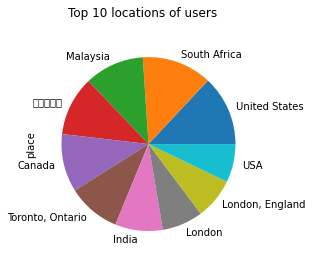

In [19]:
# top 10 locations of users
top_locations = tweets_df.place.value_counts().head(10)
top_locations.plot(kind="pie", subplots=True, title="Top 10 locations of users");

<h2>Sentiments<h2>

In [20]:
def text_category(p):
    """
    converts polarity into sentiment category
    """
    if p > 0:
        return "positive"
    elif p < 0:
        return "negative"
    else:
        return "neutral"

In [24]:
tweets_df["sentiment"] = tweets_df["polarity"].apply(text_category)
tweets_df["sentiment"].value_counts()

positive    3426
neutral     1829
negative    1277
Name: sentiment, dtype: int64

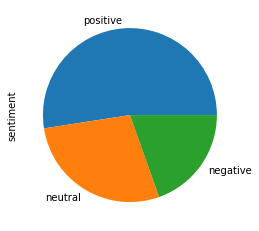

In [26]:
tweets_df["sentiment"].value_counts().plot(kind="pie");

<h2>Hashtags<h2>

In [30]:
import re
def find_hashtags(tweet):
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', str(tweet))

In [33]:
tweets_df['hashtags'] = tweets_df.clean_text.apply(find_hashtags)
tweets_df['hashtags']

0                      []
1                      []
2          [#redresearch]
3                [#Covid]
4                      []
              ...        
6527                   []
6528             [#Covid]
6529                   []
6530    [#COVID, #Africa]
6531                   []
Name: hashtags, Length: 6532, dtype: object

In [35]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
    tweets_df.hashtags.apply(
        lambda hashtags_list: hashtags_list != []
    ), ['hashtags']]
hashtags_list_df[:10]

,hashtags
2,[#redresearch]
3,[#Covid]
5,"[#WeCanDoThis, #COVID]"
9,"[#Covid, #DeltaVariant]"
10,"[#WeCanDoThis, #COVID]"
11,"[#Cuban, #COVID, #vaccines]"
13,"[#Covid, #DeltaVariant]"
16,"[#Covid, #DeltaVariant]"
17,[#COVID]
18,"[#COVID, #VaccinEquity]"


In [42]:
#create dataframe where each use of hashtag gets its own row and make the hashtags lowercase
flattened_hashtags_df = pd.DataFrame(
    [hashtag.lower() for hashtags_list in hashtags_list_df.hashtags
     for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df[:10]

,hashtag
0,#redresearch
1,#covid
2,#wecandothis
3,#covid
4,#covid
5,#deltavariant
6,#wecandothis
7,#covid
8,#cuban
9,#covid


In [43]:
flattened_hashtags_df.value_counts()

hashtag          
#covid               3002
#vaccines             265
#africa               185
#coronavirus          169
#wecandothis          153
                     ... 
#firejimjordan          1
#followfriday           1
#followthesilence       1
#oneeasttoronto         1
#copaamerica            1
Length: 747, dtype: int64

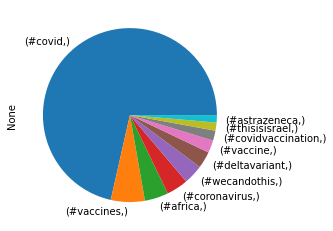

In [45]:
flattened_hashtags_df.value_counts().head(10).plot(kind="pie");

<h2>Original authors<h2>

In [52]:
tweets_df.original_author.value_counts()

PuneUpdater        530
viralvideovlogs     45
WHO__India          27
Signal__Pump        27
Rosenchild          11
                  ... 
inwitinwit           1
TarikW               1
Jane_R900            1
jwimimssi            1
murtaman             1
Name: original_author, Length: 5248, dtype: int64

PuneUpdater is the original author of around 10% of the tweets.

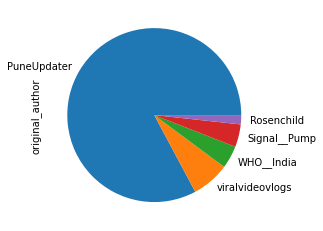

In [55]:
tweets_df.original_author.value_counts().head(5).plot(kind="pie");